# Title: Factors Related To Fatal Police Shootings

# Project proposal:

- Project Goal: Examining the various factors that are related to police shootings in the US

- Goal Description: 
 - To analyse and visualise relationships between the independent variables (like gender, location, arms age etc.) and the shooting incident. We can also explore incidents at different granularities like city or state or the arm used.
 - To try and predict (using multiple regression, or ML if possible) the combination of independent variables that are most likely to witness fatal shootings.

- Dataset Source: Data Police shootings (https://www.kaggle.com/mrmorj/data-police-shootings). Data source mentioned on Kaggle: 
https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

# Exploratory phase:

## Initial few rows of our data

In [5]:
%%bigquery
SELECT *
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
LIMIT 5

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1226,Angela Hiatt,2016-01-29,shot,None,41,F,W,Phenix City,AL,False,attack,Car,False
1,1644,Isaiah Core,2016-06-22,shot,None,20,M,B,Birmingham,AL,False,attack,Car,False
2,2025,Christian Andrew Redwine,2016-11-06,shot,None,17,M,W,Phenix City,AL,False,other,Car,False
3,2260,Micah R. Lambert,2017-01-25,shot,None,37,M,W,Oxford,AL,True,attack,Car,False
4,2701,Christopher Michael Murray,2017-06-24,shot,None,24,M,W,Deer Park,AL,False,other,Not fleeing,False


## Which state has the most deaths by a police officer?

In [6]:
%%bigquery
SELECT COUNT(id) as number_of_death,  state 
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
GROUP BY  state 
ORDER BY number_of_death DESC limit 5

,number_of_death,state
0,799,CA
1,481,TX
2,350,FL
3,254,AZ
4,195,CO


## Which city has the highest number of deaths?

In [7]:
%%bigquery
SELECT city,manner_of_death, count(*) as death
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
where manner_of_death is not null
group by city, manner_of_death
order by count(*) desc limit 5

,city,manner_of_death,death
0,Los Angeles,shot,77
1,Phoenix,shot,74
2,Houston,shot,53
3,Las Vegas,shot,41
4,San Antonio,shot,40


## What day has the highest deaths across country?

In [15]:
%%bigquery
SELECT extract(dayofweek from date) as day_name, count(*)as crimes_per_day
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
where manner_of_death is not null
group by day_name
order by count(*) desc

,day_name,crimes_per_day
0,4,829
1,3,816
2,5,810
3,6,761
4,1,753
5,2,726
6,7,721


## What has been the timeline of these fatal shootings?

In [10]:
%%bigquery
SELECT extract(year from date) year, count(*) as shootings_num
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
group by year
order by year

,year,shootings_num
0,2015,994
1,2016,962
2,2017,986
3,2018,991
4,2019,1002
5,2020,481


## How old are most of the shooting victims?

In [11]:
%%bigquery
SELECT 
CASE
WHEN age >=0 AND age <10 THEN '0~9' 
WHEN age >=10 AND age <20 THEN '10~19'
WHEN age >=20 AND age <30 THEN '20~29' 
WHEN age >=30 AND age <40 THEN '30~39'
WHEN age >=40 AND age <50 THEN '40~49'
WHEN age >=50 AND age <60 THEN '50~59'
WHEN age >=60 AND age <70 THEN '60~69'
WHEN age >=70 AND age <80 THEN '70~79'
WHEN age >=80 AND age <90 THEN '80~89'
WHEN age >=90 AND age <100 THEN '90~99'
END AS age_group,
count(*) AS number
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
WHERE age IS NOT NULL
GROUP BY age_group 
ORDER BY number DESC

,age_group,number
0,30~39,1561
1,20~29,1426
2,40~49,959
3,50~59,634
4,10~19,275
5,60~69,243
6,70~79,63
7,80~89,17
8,0~9,2
9,90~99,1


## Did they flee at the time of shooting?

In [12]:
%%bigquery
SELECT  flee, count(manner_of_death) as death
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
WHERE flee IS NOT NULL 
GROUP BY flee
ORDER BY death DESC;

,flee,death
0,Not fleeing,3411
1,Car,900
2,Foot,692
3,Other,164


## What arms did the victims possess?

In [23]:
%%bigquery
SELECT 
  armed as arm_used, 
  count(*) as shooting_num, 
  round(count(*) / (select count(*) from `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`) *100, 2) as shooting_percent
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
where armed is not null
group by armed
order by shooting_num desc limit 5

,arm_used,shooting_num,shooting_percent
0,gun,3060,56.50
1,knife,792,14.62
2,unarmed,353,6.52
3,toy weapon,186,3.43
4,undetermined,164,3.03


## What was the racial profile of the victims?

In [16]:
%%bigquery
SELECT race,
  case when race = 'W' then 'White, non-Hispanic'
       when race = 'B' then 'Black, non-Hispanic'
       when race = 'A' then 'Asian'
       when race = 'N' then 'Native American'
       when race = 'H' then 'Hispanic'
       when race = 'O' then 'Other'
       when race is null then 'Unknown'
       end as race_desciption,
  count(*) as death
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
group by race
order by death desc

,race,race_desciption,death
0,W,"White, non-Hispanic",2476
1,B,"Black, non-Hispanic",1298
2,H,Hispanic,902
3,None,Unknown,521
4,A,Asian,93
5,N,Native American,78
6,O,Other,48


# Storyline

## California has the highest number of fatal shootings thus we decided to focus our analysis for the state of California.

In [13]:
%%bigquery
SELECT COUNT(id) as number_of_death,  state 
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings` 
GROUP BY  state 
ORDER BY number_of_death DESC limit 5

,number_of_death,state
0,799,CA
1,481,TX
2,350,FL
3,254,AZ
4,195,CO


## Within California we observed that majority of the victims belonged to the age groups of 20 to 29 and 30 to 39. Thus, we decided to focus on the age group 20 to 39 for our further analysis.

In [14]:
%%bigquery
SELECT 
CASE
WHEN age >=0 AND age <10 THEN '0~9' 
WHEN age >=10 AND age <20 THEN '10~19'
WHEN age >=20 AND age <30 THEN '20~29' 
WHEN age >=30 AND age <40 THEN '30~39'
WHEN age >=40 AND age <50 THEN '40~49'
WHEN age >=50 AND age <60 THEN '50~59'
WHEN age >=60 AND age <70 THEN '60~69'
WHEN age >=70 AND age <80 THEN '70~79'
WHEN age >=80 AND age <90 THEN '80~89'
WHEN age >=90 AND age <100 THEN '90~99'
END AS age_group,
count(*) AS number
FROM `loyal-burner-291914.BA775_2A_Project.CA_Shootings` 
WHERE age IS NOT NULL
GROUP BY age_group 
ORDER BY number DESC

,age_group,number
0,30~39,232
1,20~29,228
2,40~49,135
3,50~59,74
4,10~19,44
5,60~69,19
6,70~79,5
7,80~89,1


## Next we observed that majority of the victims possessed either guns or knives which is what we decided to focus on next.

In [16]:
%%bigquery
SELECT armed, count(*) as deaths
FROM `loyal-burner-291914.BA775_2A_Project.CA_Shootings_Age`
where armed is not null
group by armed
order by deaths desc limit 5

,armed,deaths
0,gun,191
1,knife,95
2,unarmed,34
3,toy weapon,26
4,undetermined,25


## In consequence to arms possessed by the victims we next looked at the threat_level that these victims appeared to demonstrate

In [17]:
%%bigquery
SELECT threat_level, count(*) as deaths
FROM `loyal-burner-291914.BA775_2A_Project.CA_Shootings_Age`
where armed like '%gun%' or armed = 'knife'
group by threat_level
order by deaths desc

,threat_level,deaths
0,attack,182
1,other,102
2,undetermined,7


## For the victims who demonstrated threat_level =  attack, we analysed their mental state and whether or not they tried to flee

In [18]:
%%bigquery
SELECT signs_of_mental_illness, count(*) as deaths
FROM `loyal-burner-291914.BA775_2A_Project.CA_Shootings_Age`
where (armed like '%gun%' or armed = 'knife') and threat_level = 'attack'
group by signs_of_mental_illness
order by deaths desc

,signs_of_mental_illness,deaths
0,False,154
1,True,28


In [20]:
%%bigquery
SELECT flee , count(*) as deaths
FROM `loyal-burner-291914.BA775_2A_Project.CA_Shootings_Age`
where (armed like '%gun%' or armed = 'knife') and threat_level = 'attack'
group by flee
order by deaths desc

,flee,deaths
0,Not fleeing,114
1,Car,30
2,Foot,29
3,None,6
4,Other,3


# BQML

## Creating Training Dataset with 80% of the original data

In [1]:
%%bigquery
CREATE OR REPLACE TABLE BA775_2A_Project.FPS_TRAIN
AS
SELECT *
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
WHERE MOD(ABS(FARM_FINGERPRINT(CAST(ID AS STRING))),10) <= 7 AND
  manner_of_death is not null and
  armed is not null and
  age is not null and
  gender is not null and
  race is not null and
  state is not null and
  signs_of_mental_illness is not null and
  threat_level is not null and
  flee is not null and
  body_camera is not null

""


## Creating Evaluation Dataset with next 10% of the original data

In [3]:
%%bigquery
CREATE OR REPLACE TABLE BA775_2A_Project.FPS_EVAL
AS
SELECT *
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
WHERE MOD(ABS(FARM_FINGERPRINT(CAST(ID AS STRING))),10) = 8 AND
  manner_of_death is not null and
  armed is not null and
  age is not null and
  gender is not null and
  race is not null and
  state is not null and
  signs_of_mental_illness is not null and
  threat_level is not null and
  flee is not null and
  body_camera is not null

""


## Creating Testing Dataset with remaining 10% of the original data

In [4]:
%%bigquery
CREATE OR REPLACE TABLE BA775_2A_Project.FPS_TEST
AS
SELECT *
FROM `loyal-burner-291914.BA775_2A_Project.Fatal_Police_Shootings`
WHERE MOD(ABS(FARM_FINGERPRINT(CAST(ID AS STRING))),10) = 9 AND
  manner_of_death is not null and
  armed is not null and
  age is not null and
  gender is not null and
  race is not null and
  state is not null and
  signs_of_mental_illness is not null and
  threat_level is not null and
  flee is not null and
  body_camera is not null

""


## Trying to predict whether the victim exhibits signs of mental illness

### Creating the model

In [5]:
%%bigquery
CREATE or REPLACE MODEL `BA775_2A_Project.MI_model`
OPTIONS (model_type='logistic_reg', labels=['signs_of_mental_illness']) 
AS
SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
FROM `loyal-burner-291914.BA775_2A_Project.FPS_TRAIN`

""


## Evaluating the model

In [6]:
%%bigquery
SELECT *
FROM ML.EVALUATE
(
    MODEL BA775_2A_Project.MI_model,  
    (
      SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
      FROM `loyal-burner-291914.BA775_2A_Project.FPS_EVAL`
    )
)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.5,0.033058,0.762279,0.062016,0.51201,0.695936


## Predicting the label (true/false)

In [7]:
%%bigquery
CREATE OR REPLACE TABLE BA775_2A_Project.MI_predictions
AS
SELECT 
    *
FROM ML.PREDICT
(
    MODEL `BA775_2A_Project.MI_model`,
    (
      SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
      FROM `loyal-burner-291914.BA775_2A_Project.FPS_TEST`
    ),
    STRUCT(0.2617 AS threshold)
)

""


In [9]:
%%bigquery
SELECT * 
FROM `loyal-burner-291914.BA775_2A_Project.MI_predictions`
LIMIT 5

,predicted_signs_of_mental_illness,predicted_signs_of_mental_illness_probs,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,True,"[{'label': True, 'prob': 0.5807659247334468}, ...",shot,ax,37,F,W,NM,True,other,Not fleeing,False
1,True,"[{'label': True, 'prob': 0.4624456738408076}, ...",shot,ax,48,M,A,SC,True,attack,Not fleeing,False
2,True,"[{'label': True, 'prob': 0.5527471262903383}, ...",shot,ax,56,M,W,OK,True,other,Not fleeing,False
3,False,"[{'label': True, 'prob': 0.1626665122393535}, ...",shot,gun,14,M,H,CA,False,attack,Foot,True
4,False,"[{'label': True, 'prob': 0.1493448735605471}, ...",shot,gun,15,M,H,FL,False,attack,Car,False


## Trying to predict the flee column (multiple classifications)

## Creating the model

In [10]:
%%bigquery
CREATE or REPLACE MODEL `BA775_2A_Project.Flee_model`
OPTIONS (model_type='logistic_reg', labels=['flee']) 
AS
SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
FROM `loyal-burner-291914.BA775_2A_Project.FPS_TRAIN`

""


## Evaluating the model

In [11]:
%%bigquery
SELECT *
FROM ML.EVALUATE
(
    MODEL BA775_2A_Project.Flee_model,  
    (
      SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
      FROM `loyal-burner-291914.BA775_2A_Project.FPS_EVAL`
    )
)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.329719,0.268756,0.715128,0.244967,1.814361,0.713585


## Predicting the label (multiple classifications)

In [12]:
%%bigquery
CREATE OR REPLACE TABLE BA775_2A_Project.Flee_predictions
AS
SELECT 
    *
FROM ML.PREDICT
(
    MODEL `BA775_2A_Project.Flee_model`,
    (
      SELECT manner_of_death, armed, age, gender, race, state, signs_of_mental_illness, threat_level, flee, body_camera
      FROM `loyal-burner-291914.BA775_2A_Project.FPS_TEST`
    )
)

""


In [13]:
%%bigquery
SELECT *
FROM `loyal-burner-291914.BA775_2A_Project.Flee_predictions`
LIMIT 5

,predicted_flee,predicted_flee_probs,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Not fleeing,"[{'label': 'Not fleeing', 'prob': 0.8847205872...",shot,ax,37,F,W,NM,True,other,Not fleeing,False
1,Not fleeing,"[{'label': 'Not fleeing', 'prob': 0.8920492718...",shot,ax,56,M,W,OK,True,other,Not fleeing,False
2,Not fleeing,"[{'label': 'Not fleeing', 'prob': 0.9214470448...",shot,ax,48,M,A,SC,True,attack,Not fleeing,False
3,Not fleeing,"[{'label': 'Not fleeing', 'prob': 0.7115897379...",shot,gun,59,M,W,AK,False,attack,Not fleeing,False
4,Not fleeing,"[{'label': 'Not fleeing', 'prob': 0.6128225357...",shot,gun,33,M,W,AK,False,attack,Car,False


# Link to the dashboard:


https://public.tableau.com/profile/shamika.kalwe#!/vizhome/BA775-Team-2A/FinalDashboard?publish=yes

# Few snapshots of the dashboard


## Main dashboard

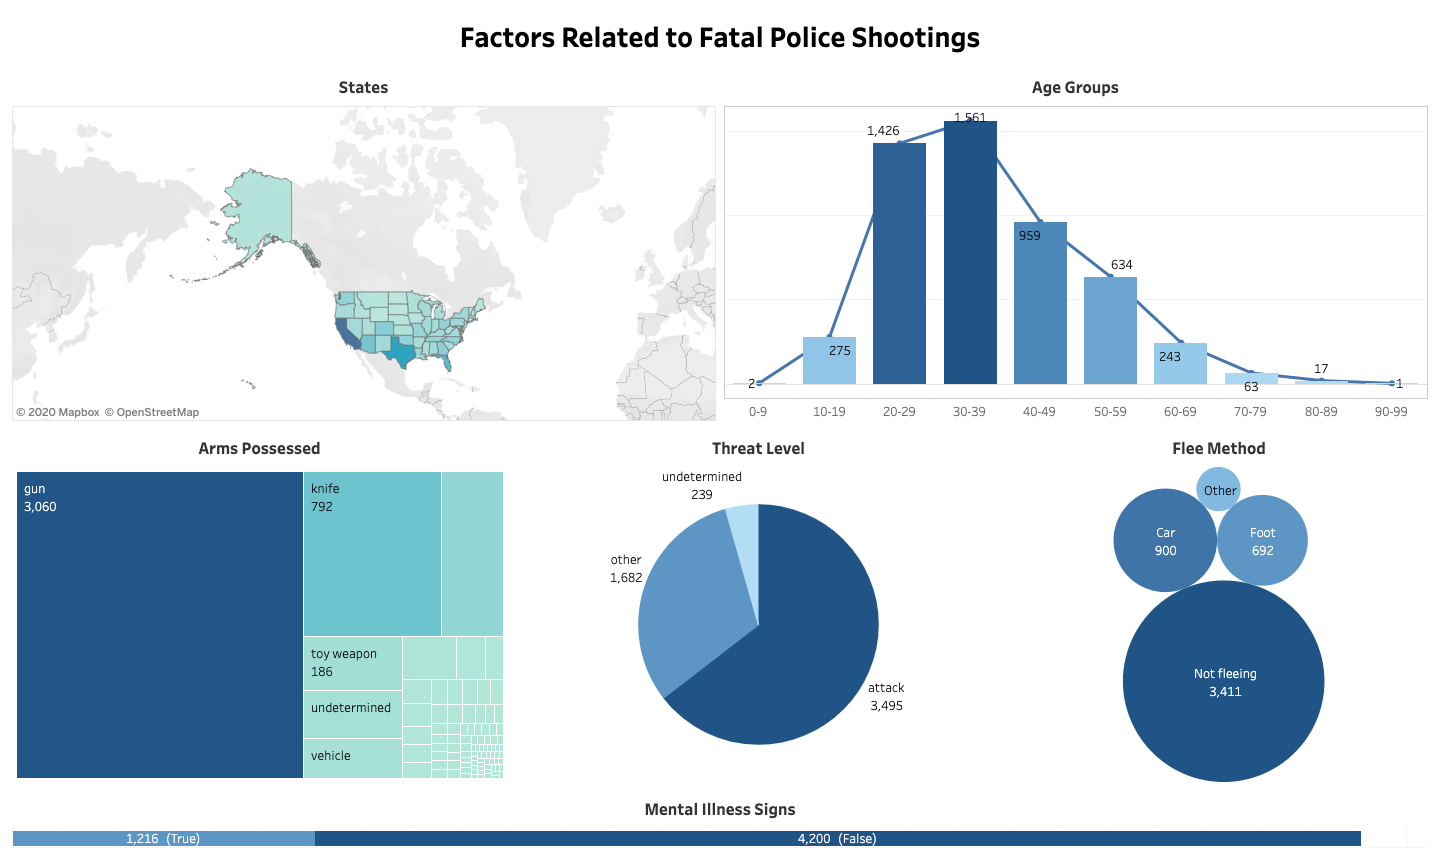

In [3]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "Dashboard Screenshot 01.png", width = 900, height = 600)

## Dashboard with filters to represent our storyline

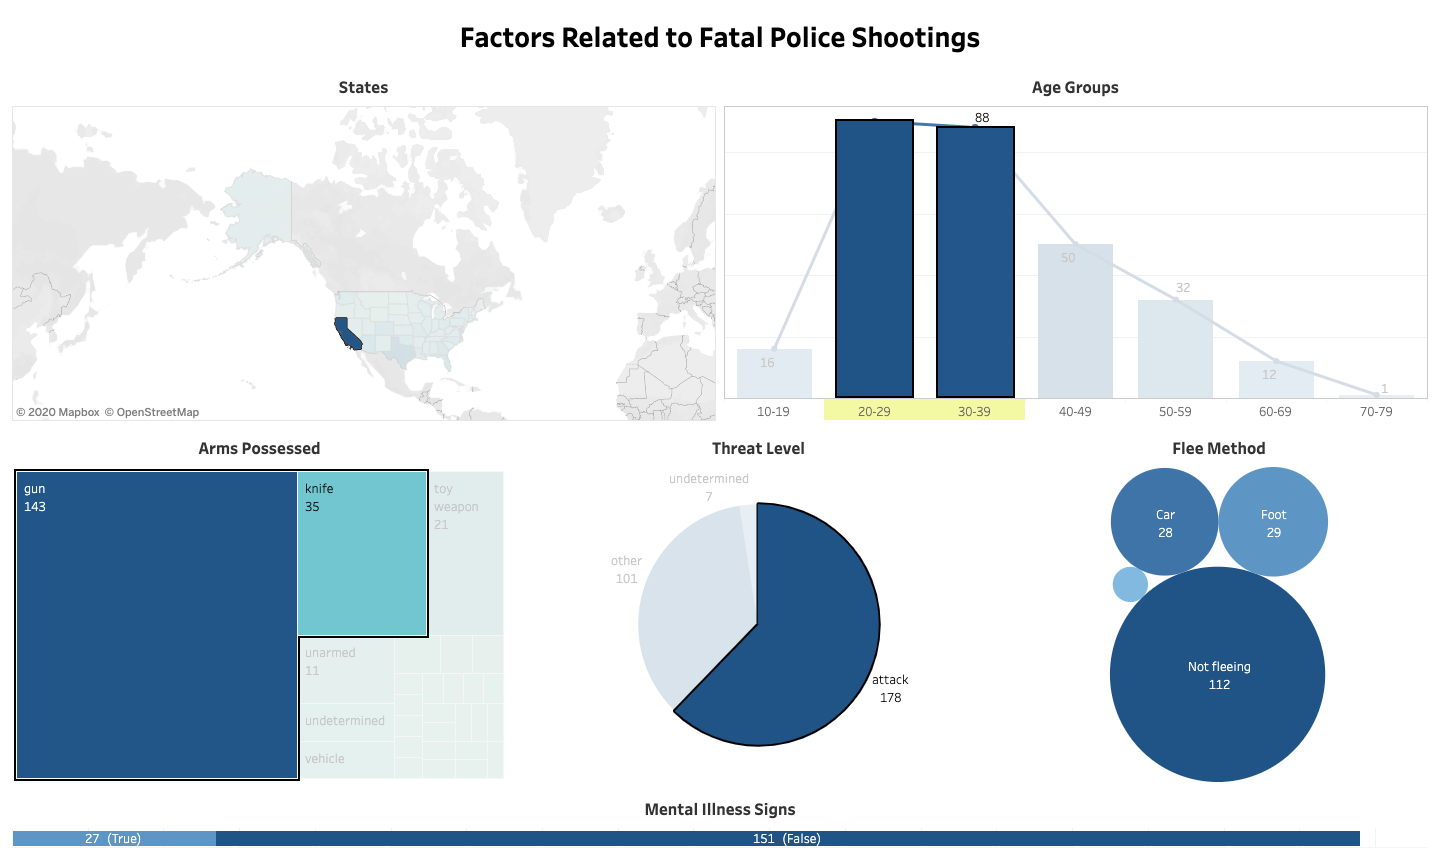

In [4]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "Dashboard Screenshot 02.png", width = 900, height = 600)